# Extract the difference between two images

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageFile
import cv2
import numpy as np
import pandas as pd

In [2]:
img1 = "beach.jpg"
img2 = "beach2.jpg"
img3 = "space.jpg"

def plotit (img):
    plt.figure(figsize = (15,8))
    plt.imshow(img,cmap = 'gray')
    plt.show()

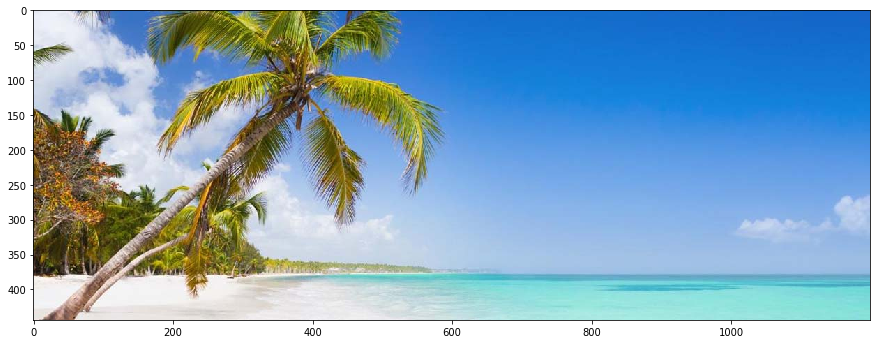

In [3]:
image1 = plt.imread(img1)
plotit (image1)

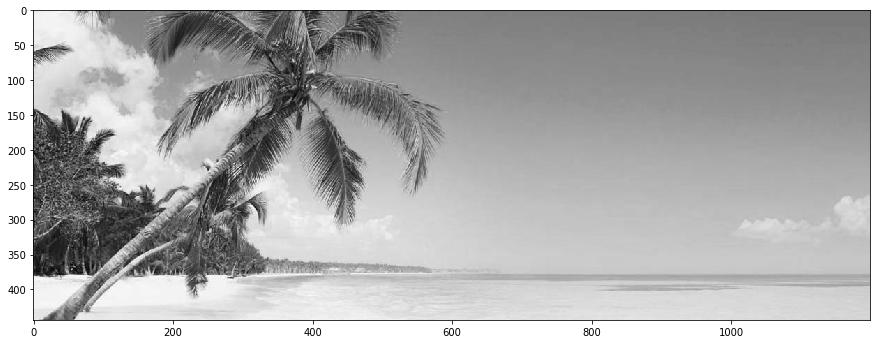

In [4]:
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
plotit (image1)

In [5]:
image1.shape

(444, 1200)

In [6]:
image1

array([[235, 235, 235, ..., 121, 121, 121],
       [235, 235, 235, ..., 121, 121, 121],
       [234, 234, 234, ..., 121, 121, 121],
       ...,
       [232, 230, 229, ..., 212, 212, 212],
       [228, 230, 231, ..., 212, 212, 212],
       [226, 230, 232, ..., 212, 212, 213]], dtype=uint8)

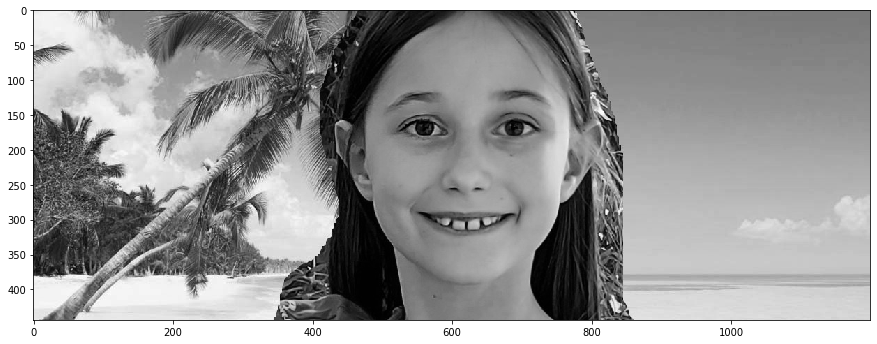

In [7]:
image2 = plt.imread(img2)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
plotit (image2)

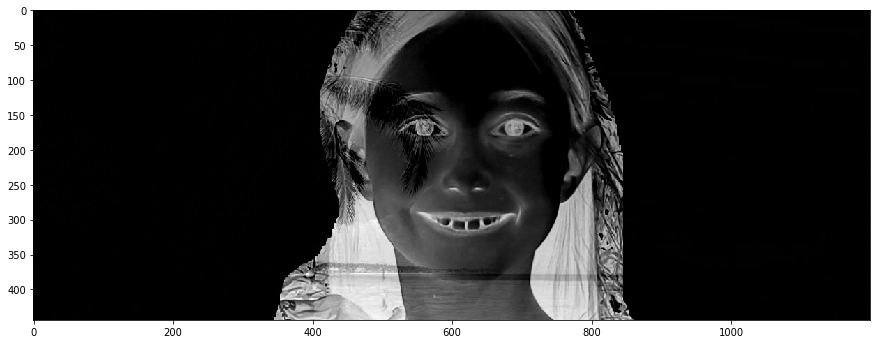

In [8]:
imageDiff = cv2.subtract (image1, image2)
plotit (imageDiff)

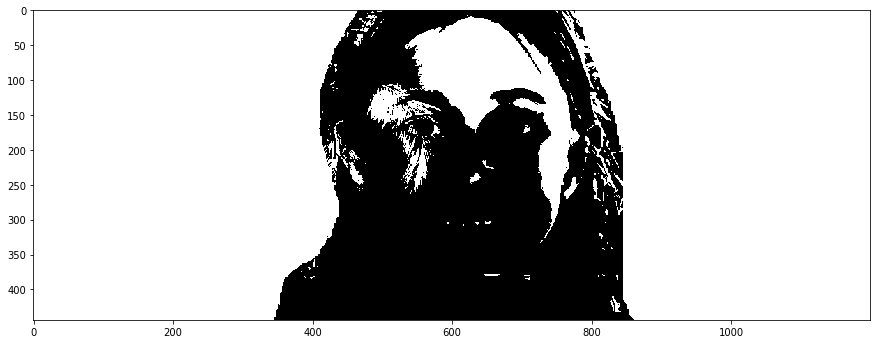

In [9]:
height, width = imageDiff.shape

imageMask = np.empty([height,width])
for y in range (height):    
    for x in range (width):    
        pix = imageDiff[y,x]
        if pix <= 10:
            imageMask[y,x] = True
        else:
            imageMask[y,x] = False
imageMask = np.array (imageMask)

plotit (imageMask)

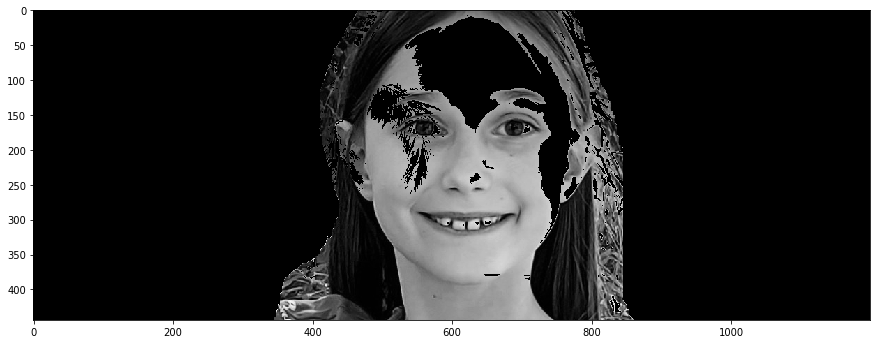

In [10]:
imageCropped = np.empty([height,width])
for y in range (height):    
    for x in range (width):    
        pix = imageMask[y,x]
        if not pix:
            imageCropped[y,x] = image2[y,x]
        else:
            imageCropped[y,x] = 0
imageCropped = np.array (imageCropped)

plotit (imageCropped)

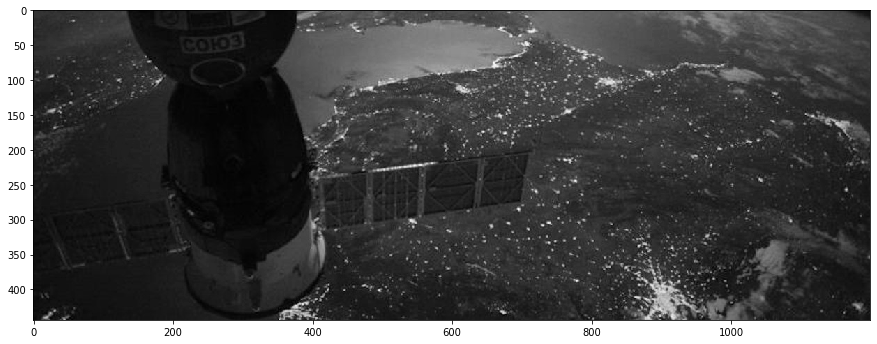

In [11]:
background = plt.imread(img3)
background = cv2.cvtColor(background, cv2.COLOR_BGR2GRAY)
plotit (background)

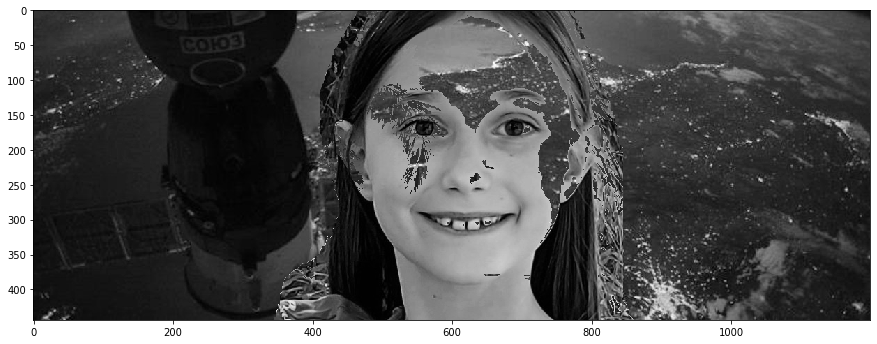

In [12]:
imageNew = np.empty([height,width])
for y in range (height):    
    for x in range (width):    
        pix = imageMask[y,x]
        if not pix:
            imageNew[y,x] = image2[y,x]
        else:
            imageNew[y,x] = background[y,x]
imageNew = np.array (imageNew)

plotit (imageNew)